**INTRODUCTION**
-

Les **maladies cardiaques** sont une cause majeur de mortalité surtout lorsqu'elles ne sont pas vite diagnostiquées . Ce projet vise à explorer le jeu de données de l'UCI sur les maladies cardiaques afin d'**identifier les principaux facteurs de risques** à travers une analyse exploratoire afin d'aider à mieux comprendre le problème et à faciliter le diagnostic. <br>
La principale question à se poser est:
- **Quels sont les facteurs qui semblent plus être corrélés ou associés à un risque plus élevé de maladies cardiaques ?** <br>
<br>
A travers cette analyse exploratoire nous essayerons de répondre à cette question .

**Signification de chaque colonne** <br>
Ce jeu de données comporte plusieurs colonnes dont les significations sont les suivantes (afin d'améliorer la compréhension de l'analyse) :
- **id** : Identifiant unique pour chaque patient
- **age** : Âge du patient en années
- **dataset** : lieu d'études (4 lieux sont notés : )
- **sex** : sexe Homme/Femme
- **cp** : type de douleur thoracique (angine typique, angine atypique, non angineuse, asymptomatique)
- **trestbps** : pression artérielle au repos (pression artérielle au repos (en mm Hg) à l'admission à l'hôpital)
- **chol** : cholestérol sérique en mg/dl
- **fbs** : si glycémie à jeun > 120 mg/dl (Vrai\Faux)
- **restecg** : résultats électrocardiographiques au repos (Valeurs : normal, anomalie stt, hypertrophie ventriculaire gauche)
- **thalach** : fréquence cardiaque maximale atteinte en battements par minute
- **exang** : angine de poitrine induite par l'exercice ? (Vrai/Faux)
- **oldpeak** : Dépression du segment ST induite par l'exercice par rapport au repos
- **slope** : la pente du segment ST de l'exercice de pointe
- **ca** : nombre de vaisseaux majeurs (0-3) colorés par fluoroscopie
- **thal** : test de stress au thallium. Ce test d'imagerie nucléaire est utilisé pour évaluer la circulation sanguine dans le cœur pendant l'exercice et au repos, et il permet de diagnostiquer la présence de maladies cardiaques (valeurs: normal ; défaut fixe (une zone du cœur ne reçoit pas suffisamment de sang même au repos); défaut réversible (une zone du cœur ne reçoit pas suffisamment de sang seulement pendant l'exercice))
- **num** : l'attribut à prédire\Stade de la maladie cardiaque (0= Pas de maladie cardiaque)

**Importation des bibliothèques nécessaires** <br>
<br>
Nous importons les bibliothèques nécessaires à l'analyse :
- Numpy pour certains calculs
- Pandas pour la manipulation des données
- Matplotlib et Seaborn pour la visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**I - Chargement et inspection des données** 
-

Nous allons procéder à une inspection des données afin de nous familiariser avec celles ci. Cela nous permettra de déceler certains problèmes de ce jeu de données afin de les corriger s'il y a lieu

In [2]:
# Chargement des données

df_initial=pd.read_csv("C:\\Data_science_ultime\\Phase 0\\Datasets\\heart_disease_uci.csv")

In [3]:
# Afichage des 5 premières lignes
df_initial.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Affichage des 5 dernières lignes
df_initial.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
# Dimensions des données
print(df_initial.shape)

(920, 16)


Cet ensemble de données contient **920 observations** et **16 colonnes ou variables**

In [6]:
# Informations sur le type de données de chaque colonne
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Explication rapide**:
- int64 : nombres entiers
- float64 : nombres décimaux
- object : chaînes de caractères

- De ce tableau nous constatons que **les colonnes de la fréquence cardiaque ('thalch') et du nombre de vaisseaux colorés par fluoroscopie ('ca')** sont de **type float** (nombres décimales) **alors que ce sont des valeurs entières (int)** .
- Nous constatons également que **plusieurs colonnes possèdent des valeurs manquantes**.

Procédons à une analyse statistique rapide de toutes les colonnes numériques.

In [7]:
# Statistiques descriptives rapides des colonnes numériques (float64 ou int64)
df_initial.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


De ce tableau, nous notons **deux problèmes fondamentaux** dans les données.
Pour les colonnes de la **pression artérielle au repos** ('trestbps') et du **cholestérol sérique** ('chol') nous constatons que leur valeur minimale est de 0 (supposant que certaines lignes portent 0 comme valeur pour ces deux colonnes): ce qui n'est pas normal .

**Résumé global**

Nom de l'ensemble de données : Heart_disease_uci <br>
Nombre d'observations: 920 <br>
Nombre de colonnes : 16 <br>
Brèves statistiques pour les colonnes numériques : <br>
  - age : min=28 ; max=92 ; moyenne=53.5 
  - trestbps : min=0 (à corriger) ; max=200 ; moyenne=132.1
  - chol : min=0 (à corriger) ; max=603 ; moyenne=199.13
  - thalch : min=60 ; max=202 ; moyenne=137.54
  - oldpeak : min= -2.6 ; max=6.2 ; moyenne=0.87 <br>

Nombre de colonnes avec des valeurs manquantes : 10


**II- Nettoyage des données**
-

Nous procéderons à présent à un nettoyage profond des données afin de corriger s'il y a lieu les anomalies révélées par l'inspection des données.

Pour ce faire , nous passerons par 4 étapes :
- La gestion des valeurs manquantes
- La vérification de l'existence de doublons (lignes dupliquées)
- La correction des types de données
- La gestion des valeurs aberrantes

**Gestion des valeurs manquantes**

Quel est le nombre de valeurs manquantes par colonne ?

In [8]:
# Nombre de valeurs manquantes par colonne
nombre_valeurs_manquantes=df_initial.isnull().sum()
nombre_valeurs_manquantes

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Les colonnes **'slope'** (pente du segment ST de l'exercice de pointe), **'ca'** (nombre de vaisseaux colorés par fluoroscopie), **'thal'** (résultats du test de stress au thallium) **présentent beaucoup de valeurs manquantes** par rapport au nombre total de lignes.

Gérons les valeurs manquantes des **colonnes numériques**. <br>
Rappelons les colonnes concernées :
- 'trestbps'
- 'chol'
- 'thalch'
- 'oldpeak'
- 'ca'


Pour les colonnes 'trestbps', 'chol', 'thalch', 'oldpeak' **nous choisissons de remplacer les valeurs manquantes par la médiane pour ne pas perdre les données** et parce qu'**il n'y a pas beaucoup de valeurs manquantes**.

In [9]:
columns=['trestbps','chol','thalch','oldpeak']
for col in columns:
    median_col=df_initial[col].median()
    df_initial[col]=df_initial[col].fillna(median_col)  

Pour la colonne 'ca' **nous choisissons de remplacer les valeurs manquantes par 0** car ce chiffre a un sens dans cette colonne et il y a **beaucoup de valeurs manquantes** (plus 2/3 des lignes sont manquantes). La conséquence de ce choix est que **les résultats d'une analyse statistique avec cette colonne ne seront pas fiable**.

In [10]:
df_initial['ca']=df_initial['ca'].fillna(0) # Remplacement des valeurs manquantes par 0


Gérons les valeurs manquantes des **colonnes catégorielles**.
Rappelons les colonnes concernées :
- 'fbs'
- 'restecg'
- 'exang'
- 'slope'
- 'thal'

Pour les colonnes 'fbs', 'restecg', 'exang' nous choisissons de **remplacer les valeurs manquantes par la catégorie la plus fréquente** car **il n'y a pas beaucoup de valeur manquantes**

Recherchons les catégories les plus fréquentes de ces colonnes

In [11]:
print("Compte pour la colonne 'fbs'\n",df_initial['fbs'].value_counts(),"\n")
print("Compte pour la colonne 'restecg'\n",df_initial['restecg'].value_counts(),"\n")
print("Compte pour la colonne 'exang'\n",df_initial['exang'].value_counts(),"\n")

Compte pour la colonne 'fbs'
 fbs
False    692
True     138
Name: count, dtype: int64 

Compte pour la colonne 'restecg'
 restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64 

Compte pour la colonne 'exang'
 exang
False    528
True     337
Name: count, dtype: int64 



***Catégorie la plus fréquente de chaque colonne***:
- 'fbs' (glycémie >120 mg/dL) : False
- 'restecg' : Normal
- 'exang' : False

Remplaçons à présent les valeurs manquantes

In [12]:
pd.set_option('future.no_silent_downcasting', True)
df_initial['fbs']=df_initial['fbs'].fillna(False)
df_initial['restecg']=df_initial['restecg'].fillna('normal')
df_initial['exang']=df_initial['exang'].fillna(False)

Pour les **colonnes 'slope' et 'thal'** nous choisissons de **créer une nouvelle catégorie 'Unknown' ('Non connu')** car **il y a beaucoup trop de valeurs manquantes**.

In [13]:
columns=['slope','thal']
for col in columns:
    df_initial[col]=df_initial[col].fillna('Unknown')

***Vérification du nombre de valeurs manquantes***

In [14]:
nomb=df_initial.isnull().sum()
nomb

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Il n'y a plus de valeurs manquantes.<br>
<br>

**Vérification de l'existence de doublons**

In [15]:
doublons=df_initial.duplicated()
nombre_doublons=doublons.sum()
print("Nombre de doublons : ",nombre_doublons)

Nombre de doublons :  0


Il n'y a pas de doublons dans cet ensemble de données

**Correction des types de données**

L'inspection avait révélé que les types des colonnes 'thalch' et 'ca' ne correspondaient pas à ce qu'ils devraient être c'est à dire des nombres entiers.

In [16]:
df_initial['thalch']=df_initial['thalch'].astype(int)
df_initial['ca']=df_initial['ca'].astype(int)

#Vérification
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    int64  
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    int64  
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 115.1+ KB


Nous pouvons voir que les valeurs de ces colonnes sont maintenant des nombres entiers (int64).<br>
<br>


**Gestion des valeurs aberrantes**

Nous rechercherons ces valeurs surtout pour les colonnes 'trestbps', 'chol' et 'thalch' puisque ce sont les plus pertinentes pour la présence de valeurs aberrantes. <br>
Nous utiliserons la méthode de l'IQR (Intervalle interquartile). Cette méthode est une technique statistique robuste pour identifier les valeurs aberrantes (outliers). Elle définit un intervalle de valeurs « normales » en se basant sur la dispersion de la moitié centrale des données et considère comme aberrants tous les points de données situés en dehors de cet intervalle.

In [17]:
def have_outliers(data,col):  # On définit une fonction qui précisera si la colonne contient des valeurs aberrantes
    Q1=data[col].quantile(0.25) # Le premier quartile
    Q3=data[col].quantile(0.75) # Le deuxième quartile
    IQR=Q3-Q1                   # Intervalle interquartile
    limit_inf=Q1-1.5*IQR        # Limite inférieure de l'intervalle des valeurs normales
    limit_sup=Q3+1.5*IQR        # Limite supérieure de l'intervalle des valeurs normales
    df_outliers=data[(data[col]<limit_inf) | (data[col]>limit_sup)]
    conditions=(data[col]<limit_inf) | (data[col]>limit_sup)
    nombre_outliers=df_outliers.shape[0]
    if df_outliers.shape[0]>0:
        return True,nombre_outliers
    else :
        return False
columns=['trestbps','chol','thalch']
for col in columns:
    print(f"Présence de valeurs aberrantes dans la colonne {col}: {have_outliers(data=df_initial,col=col)}")

Présence de valeurs aberrantes dans la colonne trestbps: (True, 28)
Présence de valeurs aberrantes dans la colonne chol: (True, 185)
Présence de valeurs aberrantes dans la colonne thalch: (True, 2)


Nous constatons qu'il y a bien des valeurs manquantes dans ces 3 colonnes. <br>
Pour la colonne 'trestbps' la tension artérielle maximale au repos est de 200 mmHg : cliniquement c'est possible mais dans des cas extrêmes. <br>
Pour la colonne 'thalch' la fréquence cardiaque maximale est de 202 : cela est un cas extrême. Dans cette colonne il n'y a que deux valeurs extrêmes. Nous pouvons les supprimer . Leur suppression permet en effet de conserver la distribution statistique globale des données afin que lors de la conception d'un modèle pour la prédiction, ce dernier puisse bien généraliser .<br>
Pour la colonne 'chol' il y a beaucoup trop de valeurs extrêmes (185/920) . Ces valeurs sont assez fréquentes et ont donc une importance pour l'étude.

In [18]:
# Suppression des deux valeurs extrêmes de la colonne thalch
Q1=df_initial['thalch'].quantile(0.25)
Q3=df_initial['thalch'].quantile(0.75)
IQR=Q3-Q1
limit_inf=Q1-1.5*IQR
limit_sup=Q3+1.5*IQR
conditions=(df_initial['thalch']<limit_inf) | (df_initial['thalch']>limit_sup)
new_df=df_initial[~conditions] # Nouveau dataframe

Nous avons à présent **918 observations**

***Gestion des colonnes 'trestbps' et 'chol'*** <br>
Ces colonnes avaient des lignes dont les valeurs étaient de 0. Vérifions d'abord pour chaque colonne le nombre de lignes concernées.

In [19]:
# Colonne 'trestbps'
df1=new_df.query('trestbps==0')
print(f"Dans la colonne 'trestbps' , {df1.shape[0]} ligne comporte 0 comme valeur")

Dans la colonne 'trestbps' , 1 ligne comporte 0 comme valeur


Pour cette colonne nous pouvons procéder sans crainte au remplacement par la valeur médiane.

In [20]:
    # Remplacement
tension_median=new_df['trestbps'].median()
new_df.loc[:,'trestbps']=np.where(new_df['trestbps']==0,tension_median,new_df['trestbps'])

In [21]:
# Colonne 'chol'
df2=new_df.query('chol==0')
print(f"Dans la colonne 'chol' , {df2.shape[0]} lignes comporte 0 comme valeur.")

Dans la colonne 'chol' , 170 lignes comporte 0 comme valeur.


Nous remplacerons ces valeurs par la valeur médiane plutôt que la moyenne car cette dernière est influencée par les 0.

In [22]:
# Remplacement
chol_median=new_df['chol'].median()
new_df.loc[:,'chol']=np.where(new_df['chol']==0,chol_median,new_df['chol'])

Vérifions maintenant les valeurs minimales de ces deux colonnes.

In [23]:
print('Valeurs minimales du cholestérol sérique : ',new_df['chol'].min(),' mg/dL')
print('Valeurs minimales de la pression artérielle au repos : ',new_df['trestbps'].min(),' mmHg')

Valeurs minimales du cholestérol sérique :  85.0  mg/dL
Valeurs minimales de la pression artérielle au repos :  80.0  mmHg


<br>

**III- Analyse univariée**
-

Nous analyserons la distribution des valeurs dans la majorité des colonnes afin de mieux les comprendre. 

**Colonnes numériques**

***Colonne 'age'***: Quelle est la distribution de l'âge des patients ?

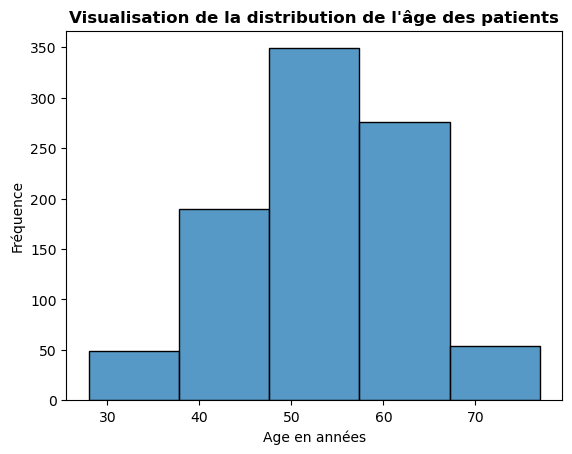

In [24]:
sns.histplot(
    data=new_df,
    x='age',
    binwidth=10
)
plt.title('Visualisation de la distribution de l\'âge des patients',fontweight='bold')
plt.xlabel('Age en années')
plt.ylabel('Fréquence')
plt.show()

Ce graphique montre que **la majorité des patients a un âge entre 40 et 70 ans** , donc la majorité est âgée. <br>
L'étude ne concerne pas les enfants.

***Colonne 'trestbps'*** : Distribution de la tension artérielle.

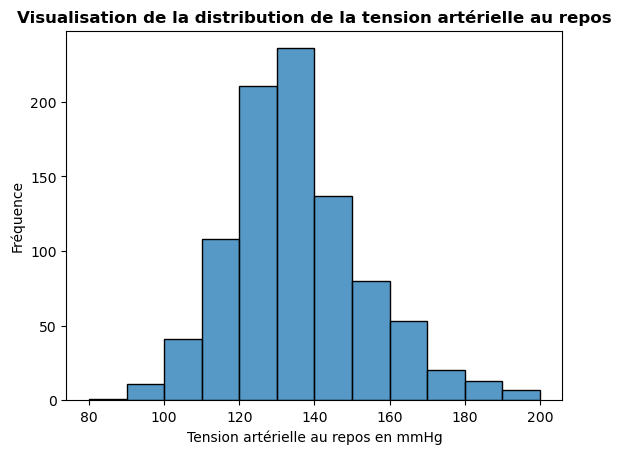

In [25]:
 sns.histplot(
    data=new_df,
    x='trestbps',
    binwidth=10
)
plt.title('Visualisation de la distribution de la tension artérielle au repos',fontweight='bold')
plt.xlabel('Tension artérielle au repos en mmHg')
plt.ylabel('Fréquence')
plt.show()

Ce graphique montre que la majorité des patients ont des **tensions artérielles entre 120 et 150 mmHg** .


***Colonne 'chol'***: Distribution du cholestérol sérique.

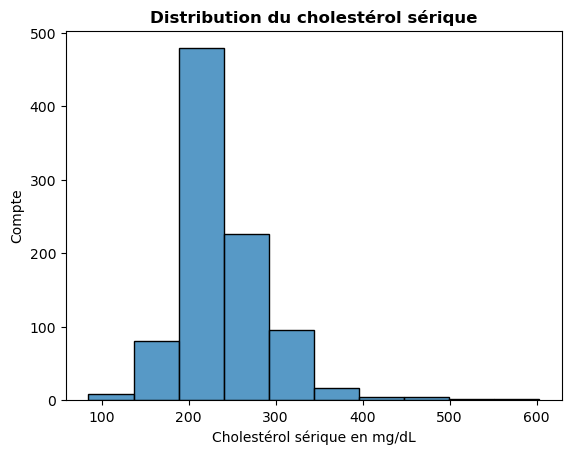

In [26]:
sns.histplot(
    data=new_df,
    x='chol',
    bins=10
)
plt.title('Distribution du cholestérol sérique',fontweight='bold')
plt.xlabel('Cholestérol sérique en mg/dL')
plt.ylabel('Compte')
plt.show()

Ce graphique révèle que la majorité à un cholestérol sérique inférieur à 300 mg/dL.

***Colonne 'thalch'*** : Distribution de la fréquence cardiaque maximale.

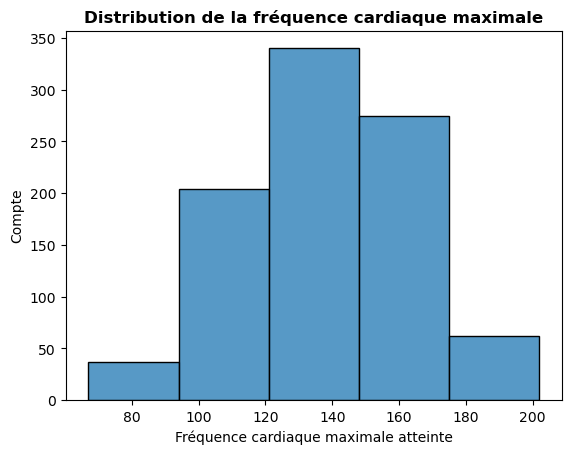

In [27]:
sns.histplot(
    data=new_df,
    x='thalch',
    bins=5
)
plt.title('Distribution de la fréquence cardiaque maximale',fontweight='bold')
plt.xlabel('Fréquence cardiaque maximale atteinte')
plt.ylabel('Compte')
plt.show()

**Colonnes catégorielles**

Nous étudierons principalement les colonnes 'sex','dataset' et 'num'. Les autres colonnes seront beaucoup plus étudiées dans l'analyse bivariée ou multivariée.

***Colonne 'sex'***: Quel est le nombre de patients par sexe ?

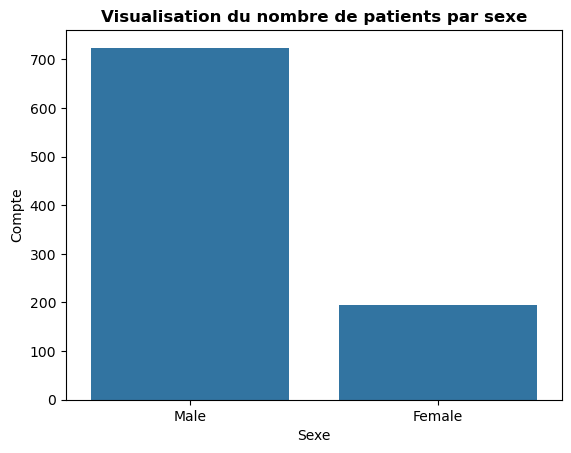

In [28]:
sns.countplot(
    data=new_df,
    x='sex'
)
plt.title('Visualisation du nombre de patients par sexe',fontweight='bold')
plt.xlabel('Sexe')
plt.ylabel('Compte')
plt.show()

La majorité des patients est de sexe masculin.

***Colonne dataset***: Quel est le nombre de patients par origine des données ?

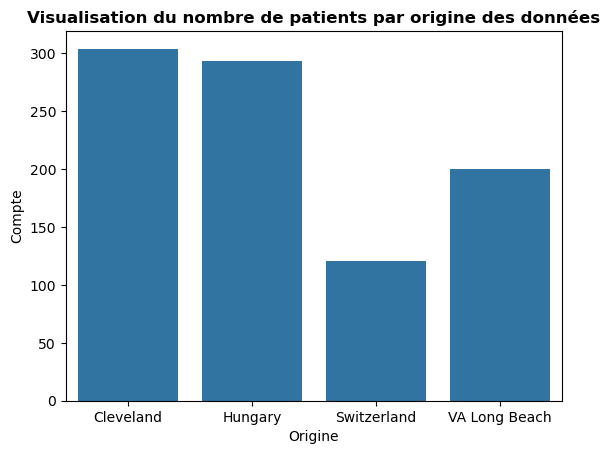

In [29]:
sns.countplot(
    data=new_df,
    x='dataset'
)
plt.title('Visualisation du nombre de patients par origine des données',fontweight='bold')
plt.xlabel('Origine')
plt.ylabel('Compte')
plt.show()

Les patients proviennent donc de ces 4 endroits . Chaque zone est assez représentée.

***Colonne num***: Quel est le nombre de patients par stade de maladie cardiaque ?

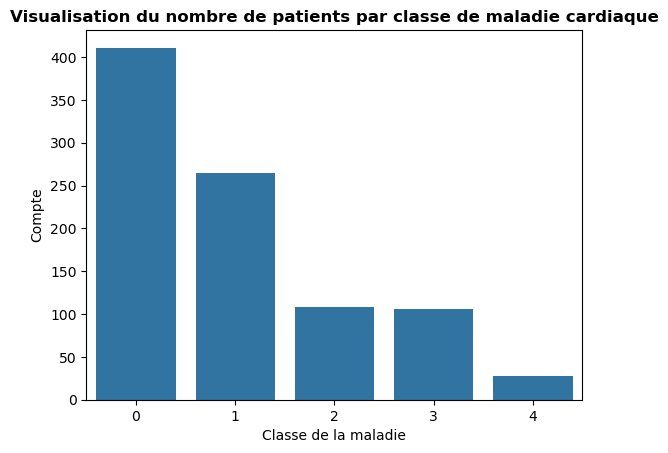

In [30]:
sns.countplot(
    data=new_df,
    x='num'
)
plt.title('Visualisation du nombre de patients par classe de maladie cardiaque',fontweight='bold')
plt.xlabel('Classe de la maladie')
plt.ylabel('Compte')
plt.show()

<br>
<br>

**IV- Analyse bivariée ou multivariée**
- 

Tout au long de cette partie, nous visualiserons plusieurs colonnes en même temps afin de découvrir des relations entre les variables et de répondre à notre question de départ.

***Relation entre l'âge et la tension artérielle*** <br>
Nous tracerons un nuage de point pour montrer la relation entre ces deux variables numériques pour chaque sexe et nous mettrons également un code couleur pour chaque stade de maladie

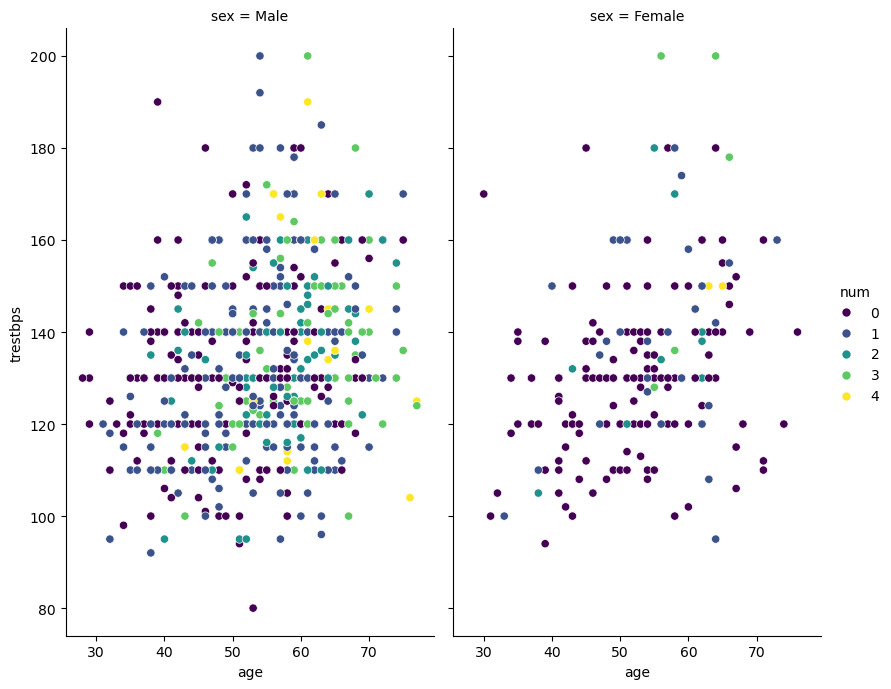

In [31]:
sns.relplot(
    data=new_df,
    x='age',
    y='trestbps',
    hue=new_df['num'],
    col='sex',
    palette='viridis',
    height=7,
    aspect=0.6
)
plt.show()

Ces graphiques montrant la relation entre l'âge et la tension artérielle pour chaque sexe,avec le stade de maladie cardiaque comme troisième dimension ,révèle que :
- **L'âge semble corrélé avec la tension artérielle (lorsque l'âge augmente, la tension artérielle augmente généralement**.
- Les maladies cardiaques ,surtout les plus graves,apparaissent beaucoup plus à des âges élevés; on déduit que **l'âge est associé à un risque plus élevé de développer une maladie cardiaque**.
- Lorsque la tension artérielle est élevée (à partir de 120 mmHg), il y a beaucoup plus de maladies cardiaques , avec prédominance des stades 2,3 et 4; on déduit qu'une **hypertension artérielle serait associée à un risque plus important de développer une maladie cardiaque**. <br>

Nous ne pouvons pas déduire une relation entre le sexe et le risque de développer la maladie pour l'instant puisque les femmes sont peu représentées dans l'étude.

***Relation entre la fréquence cardiaque maximale et la dépression du segment ST induite par l'exercice*** <br>


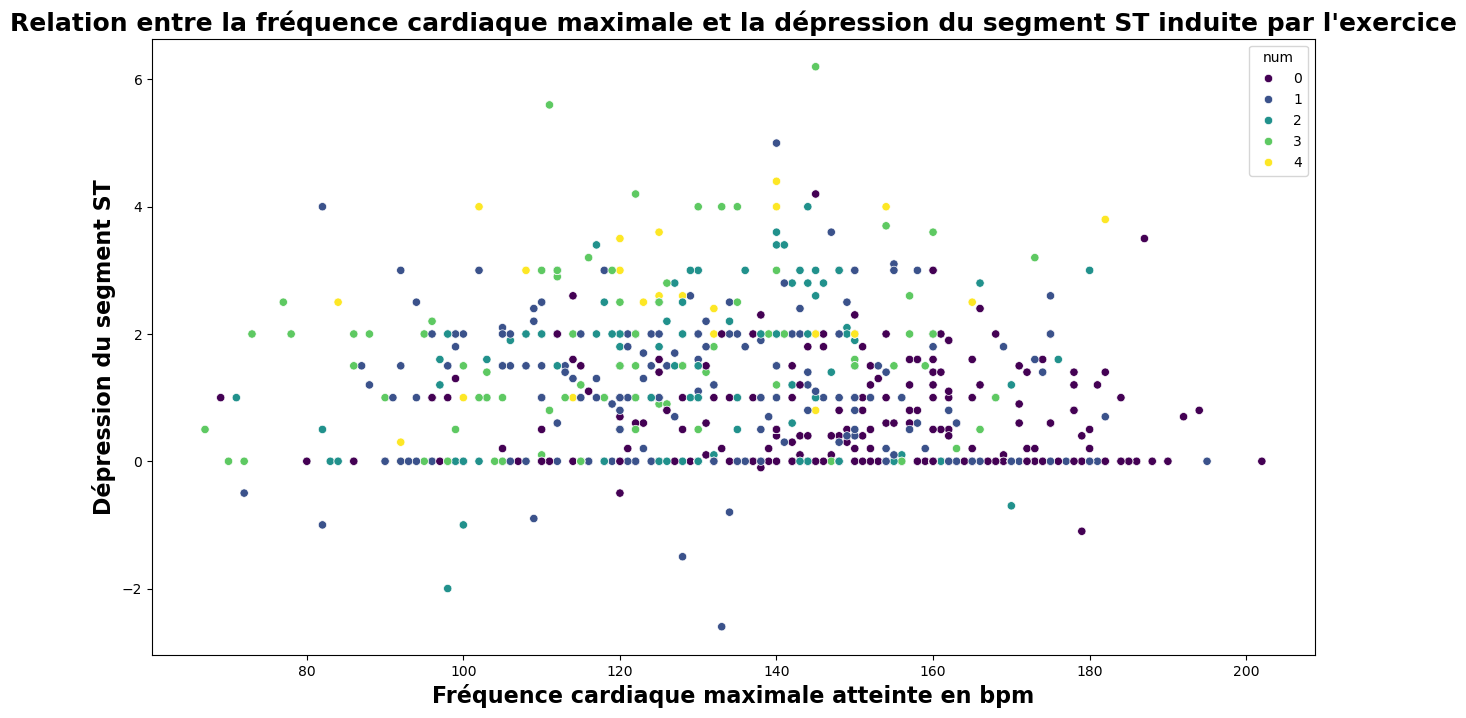

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=new_df,
    x='thalch',
    y='oldpeak',
    hue=new_df['num'],
    palette='viridis'
)
plt.title('Relation entre la fréquence cardiaque maximale et la dépression du segment ST induite par l\'exercice',fontsize=18,fontweight='bold')
plt.xlabel('Fréquence cardiaque maximale atteinte en bpm',fontsize=16,fontweight='bold')
plt.ylabel('Dépression du segment ST',fontsize=16,fontweight='bold')
plt.show()

Ce graphique ,ayant pour troisième dimension le stade de maladie cardiaque , montre que lors de l'activité physique :
- les patients sans maladies cardiaques (les points en bleu nuit) ont généralement des fréquences cardiaques élevées (> 140 bpm) associées à une faible dépression du segment ST.
- par contre, les patients ayant une maladie cardiaque ont généralement des fréquences cardiaques faibles associées ou non à une forte dépression du segment ST
- de plus les patients étant au stade 3 (les points en vert) ou 4 (les points en jaune) sont beaucoup plus représentés par une faible fréquence cardiaque (< 140 bpm) associée à une forte dépression du segment ST

Nous déduisons qu'une **fréquence cardiaque faible (< 140 bpm) lors d'un effort physique serait associée à un risque plus élevé d'avoir une maladie cardiaque; et si en plus cela est associée à une importante dépression du segment ST (valeur absolue>1) la maladie serait davantage plus grave**.

***Est ce qu'un type particulier de douleur thoracique serait un indicateur de maladie cardiaque ?***

Visualisons d'abord le nombre de patient total par type de douleur thoracique.

In [33]:
df_cp=new_df.groupby('cp')['num'].agg(['size'])
df_cp

,size
cp,
asymptomatic,494
atypical angina,174
non-anginal,204
typical angina,46


Beaucoup de patients sont asymptomatiques.

Construisons un tableau croisé entre la colonne 'cp' et 'num' pour voir la distribution des malades au sein de chaque catégorie de douleur thoracique.

In [34]:
tableau1=pd.pivot_table(
    data=new_df,
    values='id',
    index='cp',
    columns='num',
    aggfunc='size'
)
tableau1

num,0,1,2,3,4
cp,,,,,
asymptomatic,104.0,197.0,88.0,82.0,23.0
atypical angina,150.0,19.0,2.0,3.0,NaN
non-anginal,131.0,37.0,14.0,18.0,4.0
typical angina,26.0,12.0,4.0,3.0,1.0


Ce tableau révèle que la majorité des patients souffrant d'une maladie cardiaque sont asymptotiques pour ce qui concerne la douleur thoracique. De plus , beaucoup de patients ont des douleurs thoraciques sans forcément souffrir d'une maladie cardiaque. <br>
Nous déduisons que **le type de douleur thoracique ne serait pas un indicateur direct ou fiable pour prédire la possibilité d'avoir ou non une maladie cardiaque**.

Calculons le taux de personne malade pour chaque catégorie de la colonne 'exang' (angine de poitrine induite par l'exercice) pour vérifier si une douleur thoracique provoquée par l'effort est associée à un risque plus important.

In [35]:
df_exang=new_df.groupby('exang')['id'].agg(['size']) # Nombre de personnes par catégorie de la colonne
df_mal=new_df.query('num!=0') # On sélectionne uniquement les patients malades
df_mal_exang=df_mal.groupby('exang')['id'].agg(['size']) # Nombre de personnes malades par catégorie 
df_mal_exang['Nombre total de personnes']=df_exang['size']
df_mal_exang['Taux de personnes malades']=(df_mal_exang['size']*100/df_mal_exang['Nombre total de personnes'])
df_mal_exang

,size,Nombre total de personnes,Taux de personnes malades
exang,,,
False,226,582,38.831615
True,281,336,83.630952


Nous remarquons que 83.6 % des personnes ayant une angine provoquée par l'exercice ont une maladie cardiaque <br>
Nous déduisons qu'**avoir une angine provoquée par l'effort physique serait associée à un risque plus important d'avoir une maladie cardiaque.**

***Cholestérolémie et maladie cardiaque***

Nous tracerons un diagramme à barres pour voir si la cholestérolémie est , pour ces données, associée à un risque plus important de maladie cardiaque. <br>
Visualisons à l'aide d'un diagramme à barre la cholestérolémie moyenne pour chaque catégorie de maladie cardiaque.

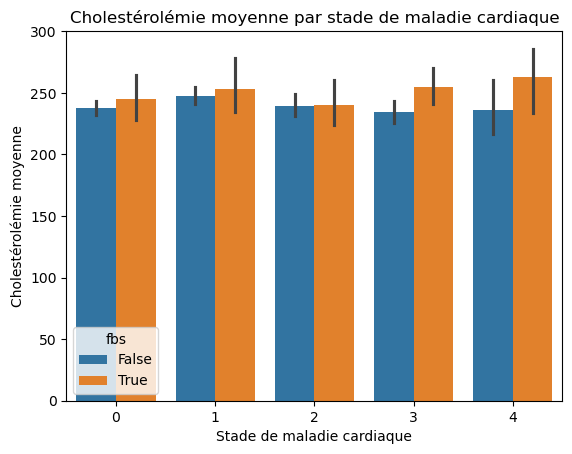

In [36]:
sns.barplot(
    data=new_df,
    x='num',
    y='chol',
    hue='fbs'
)
plt.title('Cholestérolémie moyenne par stade de maladie cardiaque')
plt.xlabel('Stade de maladie cardiaque')
plt.ylabel('Cholestérolémie moyenne')
plt.show()

Ce graphique montre principalement une relation entre la glycémie à jeun et la cholestérolémie. Lorsque **la glycémie à jeun est élevée (>120 mg\dL) , la cholestérolémie est un peu plus élevée que lorsque la glycémie est inférieure à 120 mg/dL**. Mais **nous ne notons pas vraiment une relation directe entre la cholestérolémie et la présence ou non de maladie cardiaque.**

***Glycémie et taux de patients malades*** <br>
Est ce qu'une gycémie élevée est associée à un risque plus important de maladie cardiaque ? <br>
Nous calculerons le taux de personnes malade pour chaque catégorie (True: glycémie > 120 / False: glycémie < 120)

In [37]:
df_fbs=new_df.groupby('fbs')['id'].agg(['size']) # Nombre de personnes par catégorie de résultats
df_mal=new_df.query('num!=0') # On sélectionne uniquement les patients malades
df_mal_fbs=df_mal.groupby('fbs')['id'].agg(['size']) # Nombre de personnes malades par catégorie de résultats électrocardiographiques
df_mal_fbs['Nombre total de personnes']=df_fbs['size']
df_mal_fbs['Taux de personnes malades']=(df_mal_fbs['size']*100/df_mal_fbs['Nombre total de personnes'])
df_mal_fbs

,size,Nombre total de personnes,Taux de personnes malades
fbs,,,
False,413,780,52.948718
True,94,138,68.115942


68 % des personnes ayant une glycémie élevée ont une maladie cardiaque tandis que près de 53 % des personnes ayant une glycémie faible ont une maladie cardiaque. <br>
**Une glycémie élevée semble être associée à un risque plus élevé.**

***Résultats électrocardiographiques au repos et taux de malades***

Nous calculerons le taux de personnes malades par catégorie de résultats électrocardiographiques.

In [38]:
df_restecg=new_df.groupby('restecg')['id'].agg(['size']) # Nombre de personnes par catégorie de résultats électrocardiographiques
df_mal=new_df.query('num!=0') # On sélectionne uniquement les patients malades
df_mal_restecg=df_mal.groupby('restecg')['id'].agg(['size']) # Nombre de personnes malades par catégorie de résultats électrocardiographiques
df_mal_restecg['Nombre total de personnes']=df_restecg['size']
df_mal_restecg['Taux de personnes malades']=(df_mal_restecg['size']*100/df_mal_restecg['Nombre total de personnes'])
df_mal_restecg

,size,Nombre total de personnes,Taux de personnes malades
restecg,,,
lv hypertrophy,106,188,56.382979
normal,283,551,51.361162
st-t abnormality,118,179,65.921788


On constate que  **le taux de personnes malades** est **plus important pour les patients ayant une anomalie ST-T** ( environ **2/3** )

***Type de défauts (au test de stress au thallium) et taux de malades***

Nous calculerons le taux de personnes malades par catégorie de résultats.

In [39]:
df_thal=new_df.groupby('thal')['id'].agg(['size']) # Nombre de personnes par catégorie de défauts
df_mal=new_df.query('num!=0') # On sélectionne uniquement les patients malades
df_mal_thal=df_mal.groupby('thal')['id'].agg(['size']) # Nombre de personnes malades par catégorie de défauts
df_mal_thal['Nombre total de personnes']=df_thal['size']
df_mal_thal['Taux de personnes malades']=(df_mal_thal['size']*100/df_mal_thal['Nombre total de personnes'])
df_mal_thal

,size,Nombre total de personnes,Taux de personnes malades
thal,,,
Unknown,262,486,53.909465
fixed defect,35,46,76.086957
normal,57,195,29.230769
reversable defect,153,191,80.104712


Nous constatons que :
- 80 % des personnes ayant un defaut réversible ont des maladies cardiaques
- 76 % des personnes ayant un défaut fixe ont des maladies cardiaques <br>

Nous déduisons que **les patients ayant un défaut (fixe ou réversible) auraient un risque plus important d'avoir une maladie cardiaque.**

***Pente du segment ST lors de l'exercice de pointe (colonne 'slope') et taux de personnes malades***

Nous calculerons le taux de personnes malades par catégorie de pente obtenue

In [40]:
df_slope=new_df.groupby('slope')['id'].agg(['size']) # Nombre de personnes par catégorie de pente
df_mal=new_df.query('num!=0') # On sélectionne uniquement les patients malades
df_mal_slope=df_mal.groupby('slope')['id'].agg(['size']) # Nombre de personnes malades par catégorie de pente
df_mal_slope['Nombre total de personnes']=df_slope['size']
df_mal_slope['Taux de personnes malades']=(df_mal_slope['size']*100/df_mal_slope['Nombre total de personnes'])
df_mal_slope

,size,Nombre total de personnes,Taux de personnes malades
slope,,,
Unknown,116,309,37.540453
downsloping,49,63,77.777778
flat,265,344,77.034884
upsloping,77,202,38.118812


De ce tableau :
- 77 % des personnes ayant une pente plate (flat) ont une maladie cardiaque.
- 77.7 % des personnes ayant une pente descendante (downsloping) ont une maladie cardiaque.
- seulement 38.1 % des personnes ayant une pente ascendante (upsloping) ont une maladie cardiaque. <br>

Nous déduisons qu'**à l'ECG un segment ST avec une pente plate ou une pente descendante lors de l'exercice de pointe serait associé à un risque plus élevé d'avoir une maladie cardiaque.**

***Visualisation globale des corrélations avec une carte de chaleur***

Nous réaliserons une carte de chaleur pour essayer de découvrir de nouvelles relations entre les colonnes numériques.

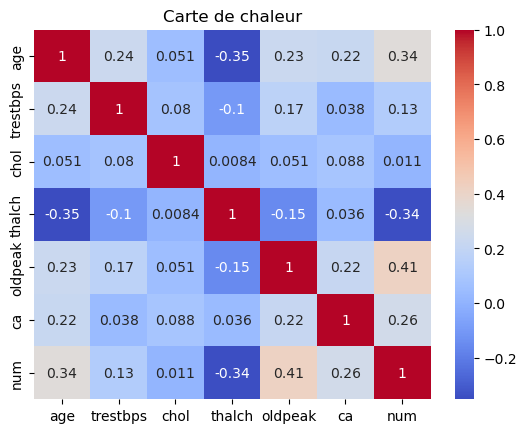

In [41]:
df_sans_id=new_df.drop('id',axis=1) # Retrait de la colonne 'id' car on en a pas besoin
col_numerique=[col for col in df_sans_id.columns if df_sans_id[col].dtype==int or df_sans_id[col].dtype==float] # On sélectionne uniquement les colonnes numériques
df_numerique=df_sans_id[col_numerique] # Le tableau des données numériques

matrice_correlation=df_numerique.corr() # Calcul de la matrice de corrélation
sns.heatmap(
    data=matrice_correlation,
    annot=True,
    cmap='coolwarm'
)
plt.title('Carte de chaleur')
plt.show()

Nous ne notons aucune autre corrélation particulière.

**V - Synthèse**
-

Ce jeu de données contient des données sur des patients et a été conçu pour prédire si un patient aurait une maladie cardiaque ou pas. <br>
Au départ il renfermait 920 observations et 16 colonnes.  Après nettoyage des données, nous avons retenu 918 observations. L'étude a été menée sur des personnes âgées de plus de 28 ans et concerne majoritairement les hommes. <br>
<br>
Les principales observations découlant de l'analyse de ces données sont les suivantes : 
- **Avoir un âge élevé et/ou une hypertension artérielle augmenterait le risque d'avoir une maladie cardiaque.**
- **Au cours de l'effort physique de pointe, avoir une faible fréquence cardiaque, ou un segment ST avec une pente plate ou descendante augmenterait le risque d'avoir une maladie cardiaque.**
- **Au repos, avoir une anomalie ST-T à l'électrocardiogramme augmenterait le risque de d'être atteint d'une maladie cardiaque.**
- **Un défaut (fixe ou réversible) au test de stress au thallium augmenterait considérablement le risque d'avoir une maladie cardiaque.**
- **Avoir une angine provoquée par l'effort physique augmenterait le risque d'avoir une maladie cardiaque.**
- **La glycémie élevée semble être associée à un risque plus élevé de maladie cardiaque.**
- **La cholestérolémie et le type de douleur thoracique n'étaient pas des indicateurs directs pour la prédiction.**  <br>
<br>

***Hypothèse pour la phase de prédiction*** <br>
- Les variables âge ('age'), la tension artérielle au repos ('trestbps'), la fréquence cardiaque ('thalch'), et les colonnes catégorielles comme 'oldpeak' (dépression du segment ST induite à l'effort par rapport au repos), 'slope' (pente du segment ST à l'effort),'exang' (angine provoquée par l'effort ?) et 'restecg' (résultats électrocardiographiques au repos) semblent être de bons prédicteur de la colonne 'num' (présence ou non de maladie cardiaque).

